In [1]:
import sys
import math
import numpy as np
import matplotlib.pyplot as plt
sys.setrecursionlimit(1500)

In [2]:
# convert input txt into an 140000 * 28 array
def inputDigit(img_dir="digitdata/trainingimages"):
    with open(img_dir) as digitTxt:
        image = [list(line)[0:28] for line in digitTxt]
        rows = len(image)
        
    for i in range(rows):
        for j in range(28):
            if image[i][j] == ' ':
                image[i][j] = 0
            else:
                image[i][j] = 1
    return image

In [3]:
def unrollImg(img):
    image_num = int(len(img)/28)     #each img consists of 28 lines
    unrolledImg = [[] for x in range(image_num)]          # 500*784
    offset = 0
    for i in range(image_num):  # i: 0--500
        for j in range(28):   # j: 0--28  roll num in rolled img
            unrolledImg[i] += img[offset+j]
        offset +=28

    return np.array(unrolledImg)

In [4]:
def readLabel(name="digitdata/traininglabels"):
    with open(name) as label:
        labels = []
        for line in label:
            labels.append(int(line[0]))
    return labels

In [5]:
trainingImg = inputDigit("digitdata/trainingimages")
np_train_img = unrollImg(trainingImg)
trainingLabel = readLabel("digitdata/traininglabels")
testImg = inputDigit("digitdata/testimages")
np_test_img = unrollImg(testImg)
testLabel = readLabel("digitdata/testlabels")

In [7]:
# ZERO init 10 perceptrons' weights to
def init_weights():
    weights = np.zeros((10, 784))
    return weights

In [8]:
def init_bias():
    bias = np.zeros(10)
    return bias

In [6]:
def mmse(preds, labels):
    error_sum = 0
    for i in len(labels):
        sum += (label[i] - preds[i]) ** 2
    return sum

In [26]:
# input: both w and x are np array
def update(w, b, true_y, pred_y, x, alpha=1):
    w = np.add(w, np.multiply(x, alpha * (true_y - pred_y)))
    b = np.add(b, alpha * (true_y - pred_y))
    return w, b

In [10]:
# input is the 10 perceptrons(weights)
# output is the prediction label for input images
def inference(weights, trainingImg):
    image_num = len(trainingImg)
    pred = np.zeros(image_num)
    for i in range(image_num):
        # train all 10 perceptrons with every single image
        cur_image = trainingImg[i]
        inference = np.zeros(10)
        for p in range(10):
            inference[p] = math.copysign(1, weights[p].dot(cur_image))
        pred[i] = inference.argmax()
    return pred

In [11]:
def show_acc(pred_label, trainingLabel):
    total = 0
    correct = 0
    for i in range(len(trainingLabel)):
        total += 1
        if pred_label[i] == int(trainingLabel[i]):
            correct += 1
    #print("accuracy is", correct/total)
    return correct/total

In [46]:
def conf_matrix(trueLabel, predLabel):
    cm = np.zeros((10,10))
    overall_acc = 0
    for i in range(len(trueLabel)):
        cm[int(trueLabel[i])][int(predLabel[i])] += 1
    total_sample_size = np.sum(cm)
    for i in range(10):
        cur_row_sum = np.sum(cm[i])
        cm[i] /= cur_row_sum
        overall_acc += cm[i][i]*cur_row_sum/total_sample_size
    return cm, overall_acc

In [47]:
def keep_k_digits(matrix):
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            matrix[i][j] = float(format(matrix[i][j], '.4f'))
    return matrix

In [51]:
def train(weights, bias, trainingImg, trainingLabel, testImg, testLabel, epoch_num=30, initial_alpha=1):
    trained_weights = weights
    training_curve = np.zeros(epoch_num)
    test_curve = np.zeros(epoch_num)
    max_acc = 0
    # iterate epoch_num times
    for e in range(epoch_num):
        # iterate through every images
        cur_alpha = initial_alpha / (e+1)    # learning rate = 
        for i in range(len(trainingImg)):
            # train all 10 perceptrons with every single image
            cur_image = trainingImg[i]
            for p in range(10):
                inf = np.sign(weights[p].dot(cur_image))
                if int(trainingLabel[i]) == p:
                    true_y = 1
                else:
                    true_y = -1
                trained_weights[p], bias[p] = update(trained_weights[p], bias[p], true_y, inf, cur_image, cur_alpha)
                #if i==10 and p==5:
                #    print(np.sum(trained_weights, axis = 1))
        #print("On epoch", e)
        #print("training acc is")
        pred_train = inference(trained_weights, trainingImg)
        training_curve[e] = show_acc(pred_train, trainingLabel)
        #print("testing acc is")
        pred_test = inference(trained_weights, testImg)
        test_curve[e] = show_acc(pred_test, testLabel)
        
        # if the current model is performing really well, save it
        if test_curve[e] > max_acc:
            max_acc = test_curve[e]
            saved_weights = trained_weights

    return trained_weights, training_curve, test_curve, saved_weights

In [76]:
#weights = init_weights()
weights = np.random.rand(10,784)
bias = init_bias()
epoch_num = 30

In [82]:
trained_weights, training_curve, test_curve, saved_weights = train(weights, bias, np_train_img, trainingLabel, np_test_img, testLabel, epoch_num, 2)

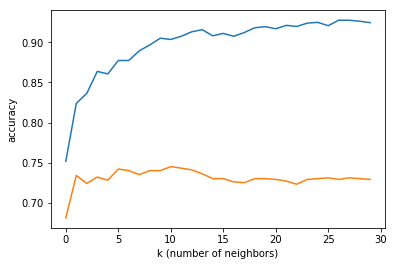

In [83]:
x = range(epoch_num)

plt.xlabel('k (number of neighbors)')
plt.ylabel('accuracy')


plt.plot(x, training_curve, x, test_curve)
plt.show()

In [84]:
predLabel = inference(saved_weights, np_test_img)

In [85]:
cm, overall_acc = conf_matrix(testLabel, predLabel)
cm = keep_k_digits(cm)
print(overall_acc)
print(cm)

0.729
[[ 0.9556  0.      0.0222  0.      0.      0.      0.0111  0.      0.0111
   0.    ]
 [ 0.0185  0.9444  0.      0.      0.0093  0.      0.0093  0.      0.0185
   0.    ]
 [ 0.0874  0.0388  0.7767  0.0194  0.0097  0.0097  0.0194  0.      0.0388
   0.    ]
 [ 0.16    0.      0.02    0.75    0.      0.03    0.      0.02    0.02    0.    ]
 [ 0.1028  0.0093  0.0374  0.0093  0.7757  0.      0.0093  0.      0.0187
   0.0374]
 [ 0.1087  0.      0.      0.087   0.0109  0.6848  0.0109  0.0217  0.0543
   0.0217]
 [ 0.1099  0.011   0.0659  0.011   0.022   0.0659  0.7143  0.      0.      0.    ]
 [ 0.1038  0.0283  0.0377  0.0566  0.0189  0.      0.      0.6792  0.0189
   0.0566]
 [ 0.3204  0.0194  0.0485  0.0583  0.0485  0.0388  0.      0.0194  0.4272
   0.0194]
 [ 0.17    0.01    0.01    0.06    0.08    0.02    0.      0.01    0.05
   0.59  ]]


In [86]:
pred_train = inference(trained_weights, np_train_img)
cm_train, overall_acc = conf_matrix(trainingLabel, pred_train)
cm_train = keep_k_digits(cm_train)
print(overall_acc)
print(cm_train)

0.9246
[[ 1.      0.      0.      0.      0.      0.      0.      0.      0.      0.    ]
 [ 0.016   0.984   0.      0.      0.      0.      0.      0.      0.      0.    ]
 [ 0.0266  0.      0.9713  0.      0.      0.      0.      0.      0.002
   0.    ]
 [ 0.0568  0.      0.0284  0.8905  0.      0.0101  0.      0.0041  0.002
   0.0081]
 [ 0.0579  0.      0.0112  0.0056  0.9178  0.      0.      0.      0.0019
   0.0056]
 [ 0.0438  0.      0.0138  0.03    0.0023  0.9101  0.      0.      0.      0.    ]
 [ 0.008   0.      0.0299  0.      0.      0.024   0.9361  0.      0.002
   0.    ]
 [ 0.0145  0.      0.0073  0.0109  0.0018  0.      0.      0.9636  0.
   0.0018]
 [ 0.1753  0.      0.0108  0.0108  0.      0.0325  0.      0.0022  0.7641
   0.0043]
 [ 0.0566  0.      0.002   0.0081  0.002   0.0101  0.      0.0202  0.0141
   0.8869]]
